In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [3]:
# Carregando o arquivo CSV (exportacao_vinhos_de_mesa)
exportacao_vinhos_de_mesa = pd.read_csv(r'C:\Users\T-GAMER\dados_pos\challenge-1\dados\Exportacao - Vinho de Mesa.csv', encoding='UTF-8', sep=r'[;\t]', decimal=',', thousands='.', quotechar='"', engine='python')
# df = pd.read_csv(r'C:\Users\T-GAMER\Documents\Estudos_Matheus_2025\dados_pos\Exportacao - Vinho de Mesa.csv', encoding='latin1', sep='\t', quotechar='"')

In [7]:
valor_anual = [col for col in exportacao_vinhos_de_mesa if col.endswith('.1')]

In [8]:
importado_por_ano_usd = exportacao_vinhos_de_mesa[['País'] + valor_anual].copy()
importado_por_ano_usd.columns = importado_por_ano_usd.columns.str.replace('.1', '', regex=False)

for col in importado_por_ano_usd.columns[1:]:
  importado_por_ano_usd[col] = pd.to_numeric(importado_por_ano_usd[col], errors='coerce')

In [9]:
importado_por_ano_usd.head()

,País,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afeganistão,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,46,0,0,0
1,África do Sul,0,0,0,0,0,0,0,0,0,...,0,0,0,0,95,21,0,0,698,1783
2,"Alemanha, República Democrática",0,0,2630,8250,0,0,0,0,0,...,44780,68109,87702,45382,25467,32605,6741,45367,31853,48095
3,Angola,0,0,0,0,0,0,0,0,0,...,17089,35390,61680,709,1065,0,0,4761,0,0
4,Anguilla,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


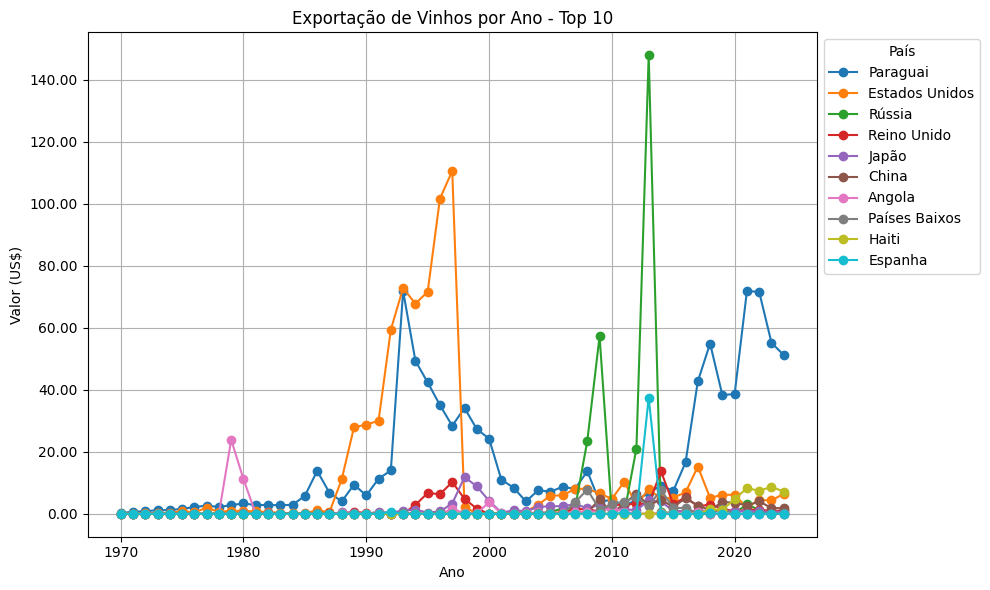

In [ ]:
# Gráfico de Valor importado por Ano por País
fig, ax = plt.subplots(figsize=(10, 6))

# Divisão de Eixo 100.000
importado_por_ano_usd_indexado = importado_por_ano_usd.set_index('País') / 100_000

# TOP 20 Países
top20_paises = importado_por_ano_usd_indexado.sum(axis=1).nlargest(10).index
df_top_10 = importado_por_ano_usd_indexado.loc[top20_paises]

# Plotando o Gráfico (agora corretamente com os top 20)
df_top_10.T.plot(ax=ax, marker='o')

# Formatação de Valores
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

# Formatação Visual
plt.title('Exportação de Vinhos por Ano - Top 10')
plt.xlabel('Ano')
plt.ylabel('Valor (US$)')
plt.legend(title='País', loc='best', bbox_to_anchor=(1, 1), ncol=1)
plt.grid(True)
plt.tight_layout()
plt.show()